In [82]:
#importing libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")





In [84]:
#load the data


In [85]:
data = pd.read_csv('/content/heart.csv')

# **Data** **overview**
inspeting the dimension of data

In [86]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [87]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [88]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Dataset Description**

There are 14 columns:

age. The age of the patient.

sex. The gender of the patient. (1 = male, 0 = female).

cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).

trestbps. Resting blood pressure in mmHg.

chol. Serum Cholestero in mg/dl.

fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).

restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).

thalach. Max heart rate achieved.

exang. Exercise induced angina (1 = yes, 0 = no).

oldpeak. ST depression induced by exercise relative to rest.

slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).

ca. Number of major vessels (0–3) colored by flourosopy.

thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).

target. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).




In [89]:
data.shape

(1025, 14)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**DATASET OVERVIEW**


>The dataset consist of 1025 total entries indicating there are 1025 patient's record.

> There are 14 columns in total.


> These columns are mix of numerical(int64 and float) and categorical data types.









In [91]:
#CHECKING FOR MISSING VALUES.

In [92]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [93]:
#CHECKING FOR DUPLICATES VALUE

In [94]:
data_dup = data.duplicated().any()

In [95]:
data_dup

True

In [96]:
data = data.drop_duplicates()
data_dup = data.duplicated().any()
data_dup


False

In [97]:
#CHECKING THE SHAPE OF DATA AFTER REMOVING DUPLICATES VALUE

In [98]:
data.shape

(302, 14)

**Generating a statistical summary of data**

In [99]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [100]:
#correlation matrix

In [101]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

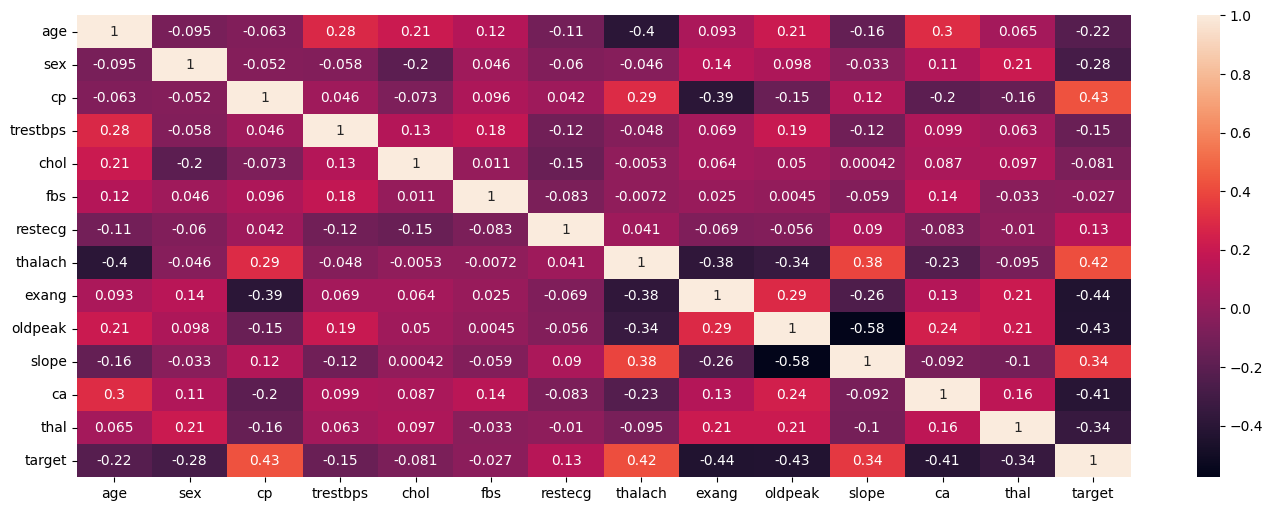

In [102]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

In [103]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [104]:
# checking the distribution of the target variable

In [105]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

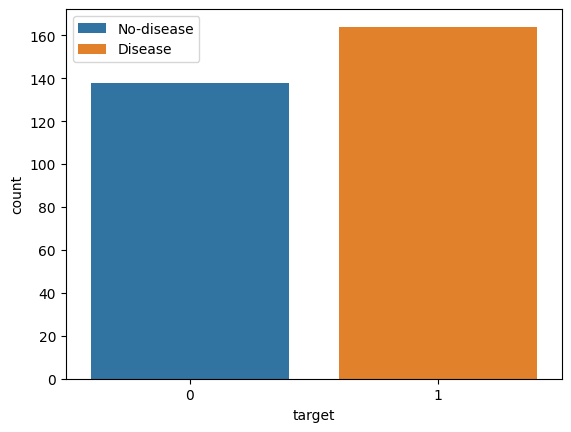

In [106]:
sns.countplot(data=data,x='target',hue='target')
plt.legend(labels=['No-disease','Disease'])
plt.show()

In [107]:
# checking the distribution of the age variable

In [108]:

data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

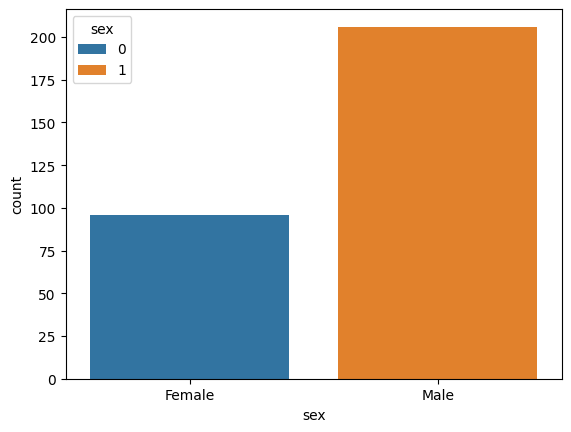

In [109]:
sns.countplot(data=data,x='sex',hue='sex')
plt.xticks([0,1],['Female','Male'])
plt.show()

In [110]:
#sex wise decease count visulaisation

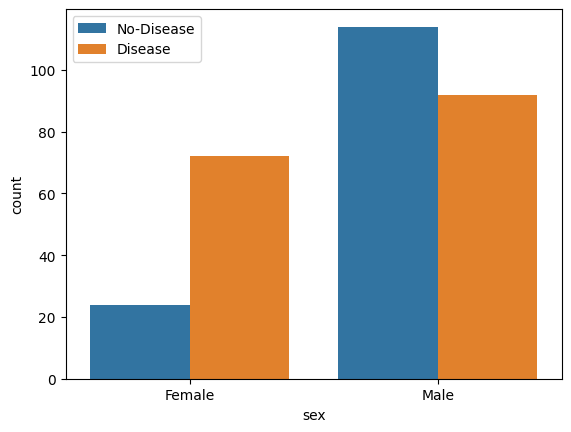

In [111]:
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

In [112]:
#checking for distribution of age(Density)

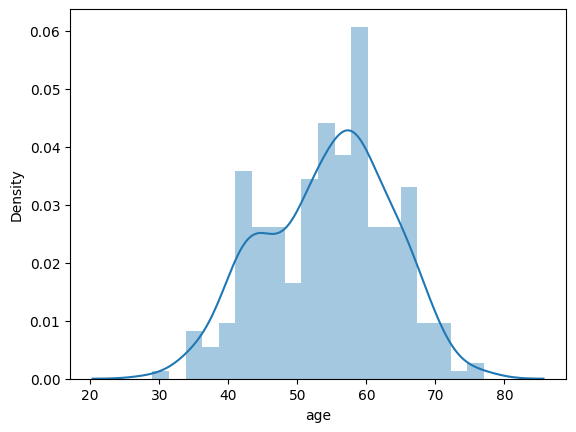

In [113]:
sns.distplot(data['age'],bins=20)
plt.show()

In [114]:
## checking the distribution of the chest pain variables

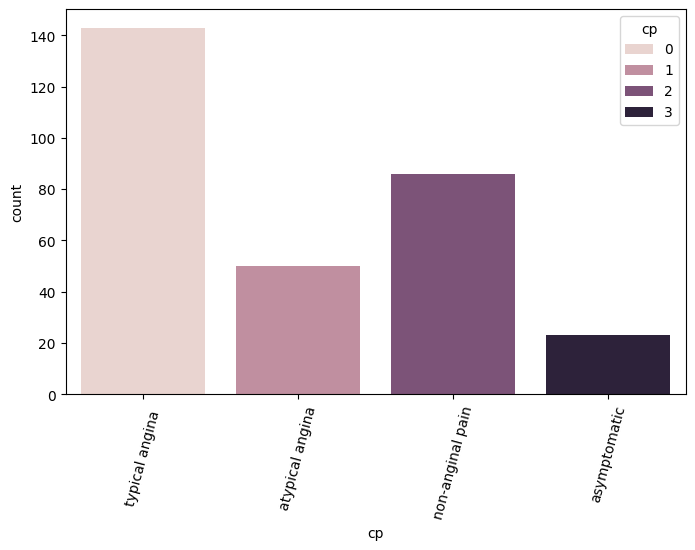

In [115]:
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='cp',hue='cp')
plt.xticks([0,1,2,3],["typical angina ","atypical angina","non-anginal pain","asymptomatic"])
plt.xticks(rotation=75)
plt.show()

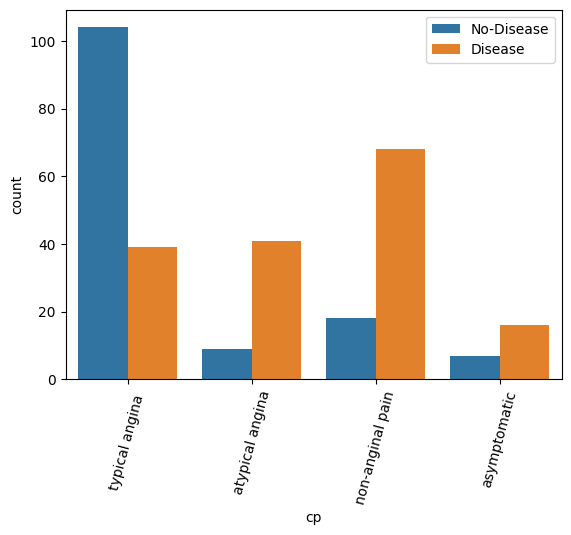

In [116]:
sns.countplot(x='cp',hue='target',data=data)
plt.xticks([0,1,2,3],["typical angina ","atypical angina","non-anginal pain","asymptomatic"])
plt.legend(labels=['No-Disease','Disease'])
plt.xticks(rotation=75)
plt.show()

In [117]:
# checking the distribution of the fasting blood sugar variable

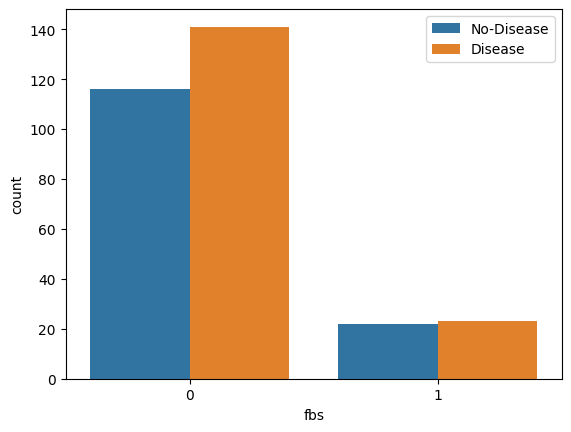

In [118]:
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

In [119]:
## checking the distribution of the resting blood pressure variables

<Axes: >

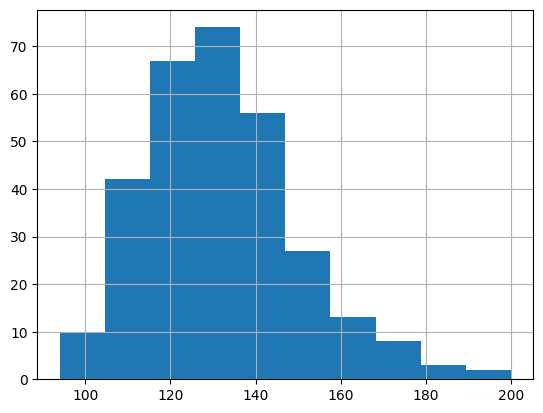

In [120]:
data['trestbps'].hist()

In [121]:
#sex wise density of data distribution over resting blood pressure

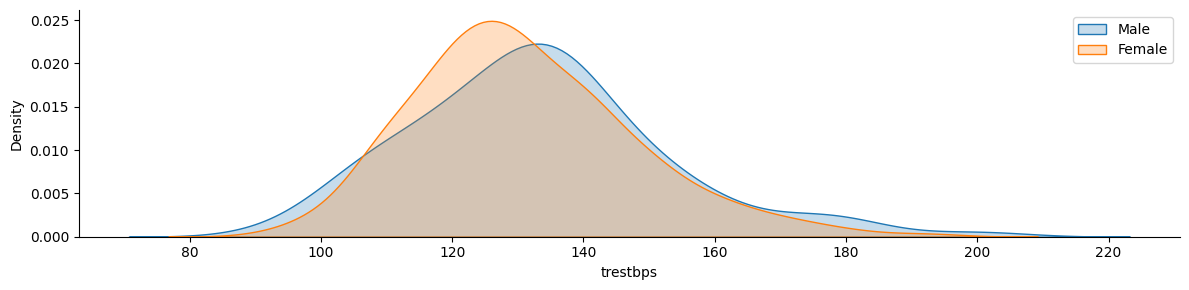

In [122]:
g=sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

In [123]:
## checking the distribution of the serum cholestrol variable

<Axes: >

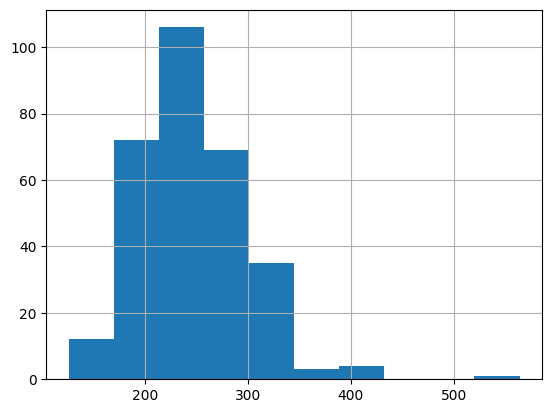

In [124]:
data['chol'].hist()

In [126]:
# handle outliers using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the nearest bound
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Handle outliers for 'age', 'trestbps', and 'chol', 'thalach','oldpeak' columns
columns_to_handle = ['age','trestbps', 'chol','thalach','oldpeak']

for column in columns_to_handle:
    handle_outliers_iqr(data, column)




In [127]:
#seperating categorical values and continuous features

In [128]:
cat_val =[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cat_val.append(column)
    else:
        cont_val.append(column)


In [129]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

**Our categorical features are:**

sex

cp

fbs

restecg

exang

slope

ca

thal

target

In [130]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**Our continuous features are:**

age

trestbps

chol

thalach

oldpeak

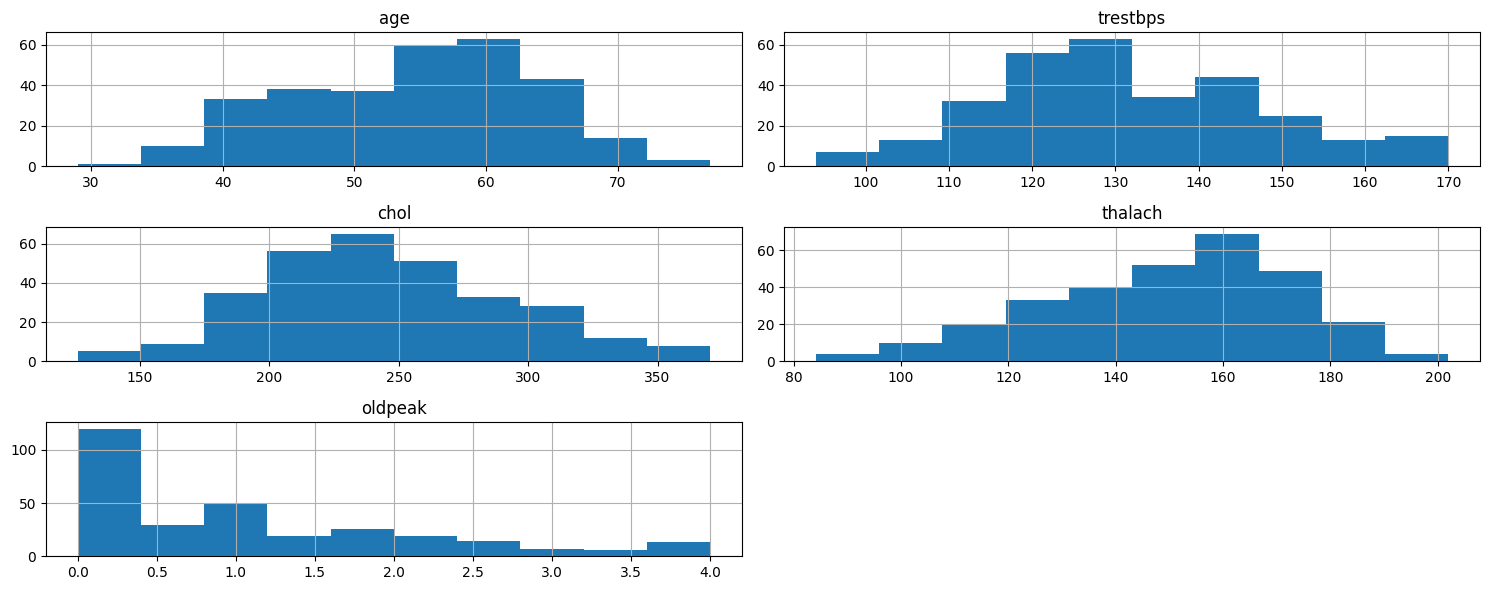

In [131]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

In [132]:
data['cp'].unique()

array([0, 1, 2, 3])

In [133]:
#one hot encoding

In [134]:
cat_val.remove('sex')
cat_val.remove('target')
data=pd.get_dummies(data,columns=cat_val,drop_first=True)

In [135]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125.0,212.0,168.0,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140.0,203.0,155.0,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145.0,174.0,125.0,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148.0,203.0,161.0,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138.0,294.0,106.0,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [136]:
#standardizing the data

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [139]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.377511,-0.704039,0.808993,-0.025091,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.527318,-0.893880,0.237018,1.869266,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.828927,-1.505591,-1.082925,1.418229,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,1.009893,-0.893880,0.501006,-0.927166,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.406674,1.025627,-1.918889,0.786777,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [140]:
#TARGET SEPERATION

In [141]:
X = data.drop('target',axis=1)
y=data['target']

In [142]:
#Handling the imbalance data in Target

In [143]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [144]:
smk = SMOTETomek(random_state=42)
X_resampled, y_resampled = smk.fit_resample(X, y)


In [145]:
X_resampled.shape,y_resampled.shape

((310, 22), (310,))

**SPLITTING THE DATA INTO TRAINING AND TESTING SET.**

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
np.random.seed(7)
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)


RANDOM **FOREST** **CLASSIFIER**

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [149]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [150]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
y_pred4=rf.predict(X_test)
accuracy_score(y_test,y_pred4)

0.8225806451612904

**HYPERPARAMETER TUNNING**

**Randomized SearchCV**

In [152]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter for Random Forest Classifier
RFC_hp = {
    'n_estimators':np.arange(10,1000,100),
    'max_depth'  :[None,3,5,6,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf' : np.arange(1,10,2)
}


In [153]:
rfc = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=RFC_hp,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)
print(f"acuracy of random forest is :",rfc.score(X_test,y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
acuracy of random forest is : 0.8387096774193549


In [154]:
rfc.best_params_

{'n_estimators': 710,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None}

In [155]:
best_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=710
)

best_rf_model.fit(X, y)

best_rf_model.score(X,y)
print(f"accuracy score of best rf_model is:",best_rf_model.score(X,y))

accuracy score of best rf_model is: 0.9503311258278145


#Cross Validation

In [156]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# Instantiate StratifiedKFold with the desired number of folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and compute the scores
cross_val_scores = cross_val_score(best_rf_model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Print the mean and standard deviation of the scores
print(f"Mean accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard deviation: {cross_val_scores.std():.2f}")


Cross-validation scores: [0.73770492 0.80327869 0.76666667 0.85       0.78333333]
Mean accuracy: 0.79
Standard deviation: 0.04


#Confusion matrix,f1_score,Classification_report

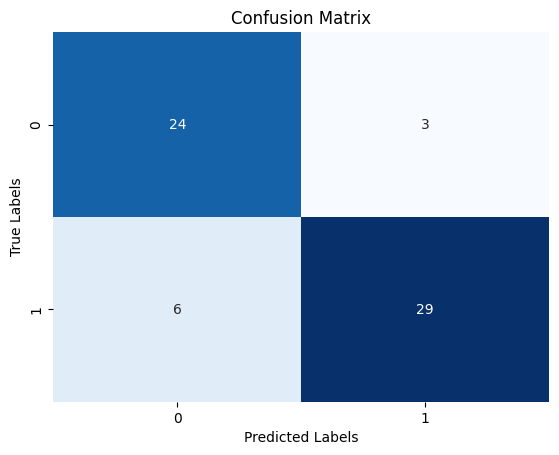

F1 Score: 0.8656716417910447
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.91      0.83      0.87        35

    accuracy                           0.85        62
   macro avg       0.85      0.86      0.85        62
weighted avg       0.86      0.85      0.86        62



In [158]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

best_rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


**Feature Importance**

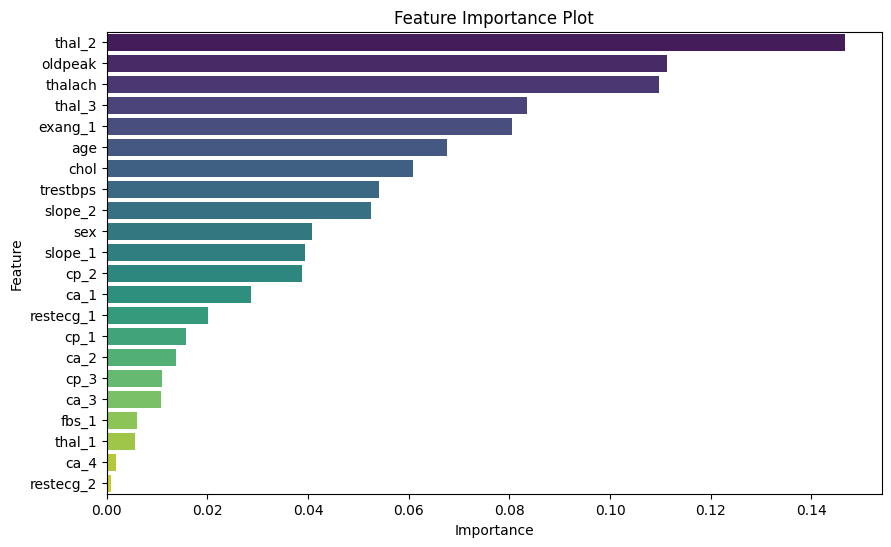

In [159]:

# As we have trained our Random Forest model (best_rf_model)
best_rf_model.fit(X_train, y_train)

#feature importances
feature_importances = best_rf_model.feature_importances_

#feature names
feature_names = X.columns

#DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


***ROC CURVE***


In [160]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


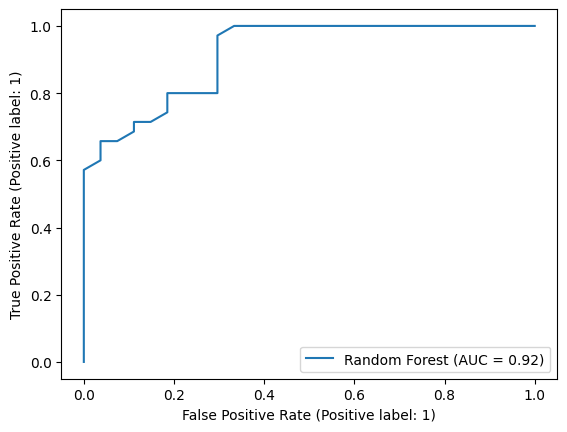

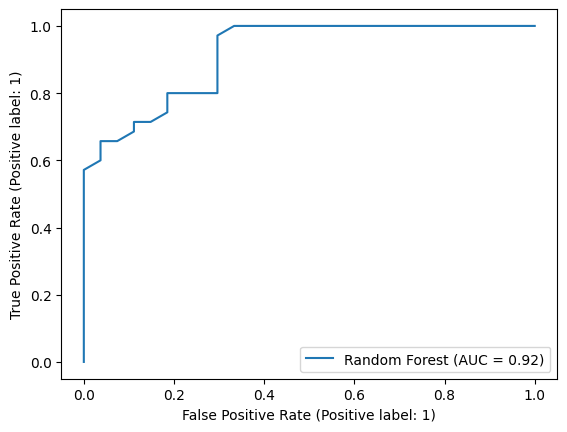

In [161]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_prob = rf.predict_proba(X_test)[:, 1]
roc_display = RocCurveDisplay.from_estimator(rf, X_test, y_test, name='Random Forest')
roc_display.plot()
plt.show()

In [162]:
from sklearn.metrics import roc_auc_score

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf.fit(X_train, y_train)

# Predict probabilities on the test set
y_probabilities = rf.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_probabilities)

# Print the AUC-ROC score
print("AUC-ROC Score:", auc_roc_score)


AUC-ROC Score: 0.9164021164021164
